In [36]:
import random
import pandas as pd
import numpy as np

In [37]:
df1 = pd.read_csv("Data1.csv")
df1

,x,y
0,0.1,8.298133
1,0.2,4.919282
2,0.3,4.145139
3,0.4,6.850788
4,0.5,6.375323
...,...,...
95,9.6,28.420698
96,9.7,27.984652
97,9.8,30.336851
98,9.9,30.376285


In [38]:
# Extract xi and yi
df = pd.read_csv("Data1.csv")
xi = df['x']
yi = df['y']

# Calculate necessary sums
n = len(df)
sum_x = xi.sum()
sum_y = yi.sum()
sum_xy = (xi * yi).sum()
sum_x_squared = (xi ** 2).sum()

# Calculate m and c using the normal equations
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
c = (sum_y * sum_x_squared - sum_x * sum_xy) / (n * sum_x_squared - sum_x**2)

# Print the final values of m and c
print("Final value of m:", m)
print("Final value of c:", c)


Final value of m: 2.3840600660571836
Final value of c: 5.680787126761231


In [39]:
x=5.2
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
c = (sum_y * sum_x_squared - sum_x * sum_xy) / (n * sum_x_squared - sum_x**2)
y=m*x+c
print(y)

18.077899470258586


DATASET 4

In [40]:
import pandas as pd
import numpy as np

df4 = pd.read_csv("Data4.csv")
# Insert a column of ones as x0
df4.insert(1, 'x0', 1)
input_columns = ['x0', 'x1', 'x2', 'x3']
input_df = df4[input_columns]

def linear(input, output):

    input_df = input.copy()
    df4['y'] = output

    # NumPy array 'x' containing the transpose of the input features
    X = np.array([input_df[feature] for feature in input_columns])
    X_transpose = X.T

    #product of x and its transpose
    productof_X_X_transpose = np.dot(X, X_transpose)

    #inverse of x_xt
    inverseof_X_X_transpose = np.linalg.inv(productof_X_X_transpose)

    #the product of x and the target variable 'y'
    sum_xy = np.dot(X, np.array([df4['y']]).T)

    #the weight vector 'w'
    w = np.dot(inverseof_X_X_transpose, sum_xy)
    print("w : ", w)
    y_predicted = X_transpose @ w
    return y_predicted
y_predicted = linear(input_df, df4['y'])

def calculate_error(Y_predicted, Y_actual):

    Y_actual = np.array([Y_actual]).T
    mse = (((Y_actual - Y_predicted)**2)/len(Y_actual)).sum()
    mae = np.mean(np.abs(Y_actual - Y_predicted))
    rmse = np.sqrt(mse)

    rss = ((Y_actual - Y_predicted)**2).sum()
    tss = ((Y_actual - Y_actual.sum()/len(Y_actual))**2).sum()
    r_square = (1 - rss/tss)

    print("Mean Square Error : ", mse)
    print("Mean Absolute Error : ", mae)
    print("R_Square Value : ", r_square)
    print("Root Mean Sq Error: ", rmse)
    
calculate_error(y_predicted,df4['y'])

w :  [[13.23947782]
 [ 6.13243763]
 [ 2.39226554]
 [ 7.74681038]]
Mean Square Error :  34.62048082924356
Mean Absolute Error :  5.155505630379489
R_Square Value :  0.9841749058943147
Root Mean Sq Error:  5.883917133104745


In [41]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Load the data
df4 = pd.read_csv("Data4.csv")
# Insert a column of ones as x0
df4.insert(1, 'x0', 1)

# Prepare the input and output data
input_columns = ['x0', 'x1', 'x2', 'x3']
X = df4[input_columns].values
y = df4['y'].values

# Train a linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Predict using scikit-learn model
y_pred_sklearn = model_sklearn.predict(X)

# Calculate evaluation metrics using scikit-learn model
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y, y_pred_sklearn)

# Print evaluation metrics for scikit-learn model
print("Scikit-learn Model:")
print("Mean Squared Error:", mse_sklearn)
print("Mean Absolute Error:", mae_sklearn)
print("R-squared:", r2_sklearn)
print("Root Mean Squared Error:", rmse_sklearn)



Scikit-learn Model:
Mean Squared Error: 34.62048082924357
Mean Absolute Error: 5.155505630378744
R-squared: 0.9841749058943147
Root Mean Squared Error: 5.883917133104745


In [42]:
def gradientDescent(X_test, Y_test):
        global w
        x = np.array([X_test[col] for col in X_test.columns])
        xt = x.T
        w = np.zeros((1, len(X_test.columns)))
        for i in range(100000):
            gradient = (w @ x - np.array([Y_test])) @ xt
            w = (w - 0.00005*gradient)
        return w
gradientDescent(input_df,df4['y'])
print("w using gradient descent: ", gradientDescent(input_df,df4['y']))

w using gradient descent:  [[13.23947579  6.13243433  2.3922683   7.74681094]]


DATASET 3

In [43]:
import pandas as pd
import numpy as np

df3 = pd.read_csv("Data3.csv")
# Insert a column of ones as x0
df3.insert(1, 'x0', 1)
input_columns = ['x0', 'x']
input_df = df3[input_columns]


def linear(input, output):

    input_df = input.copy()
    df3['z'] = output

    # Creating a NumPy array 'x' containing the transpose of the input features
    X = np.array([input_df[feature] for feature in input_columns])
    X_transpose = X.T

    # Computing the product of x and its transpose
    productof_X_X_transpose = np.dot(X, X_transpose)

    # Computing the inverse of x_xt
    inverseof_X_X_transpose = np.linalg.inv(productof_X_X_transpose)

    # Computing the product of x and the target variable 'y'
    sum_xy = np.dot(X, np.array([df3['z']]).T)

    # Computing the weight vector 'w'
    w = np.dot(inverseof_X_X_transpose, sum_xy)
    print("w: ",w)
    y_predicted = X_transpose @ w
    return y_predicted
y_predicted = linear(input_df, df3['z'])

def calculate_error(Y_predicted, Y_actual):

    Y_actual = np.array([Y_actual]).T
    mse = (((Y_actual - Y_predicted)**2)/len(Y_actual)).sum()
    mae = np.mean(np.abs(Y_actual - Y_predicted))
    rmse = np.sqrt(mse)

    rss = ((Y_actual - Y_predicted)**2).sum()
    tss = ((Y_actual - Y_actual.sum()/len(Y_actual))**2).sum()
    r_square = (1 - rss/tss)
    
    print("Mean Square Error : ", mse)
    print("Mean Absolute Error : ", mae)
    print("R_Square Value : ", r_square)
    print("Root Mean Sq Error: ", rmse)

calculate_error(y_predicted,df3['z'])

w:  [[1.17706208]
 [0.09419021]]
Mean Square Error :  0.16173044143088555
Mean Absolute Error :  0.29467793301310385
R_Square Value :  0.3136973226728078
Root Mean Sq Error:  0.40215723471160575


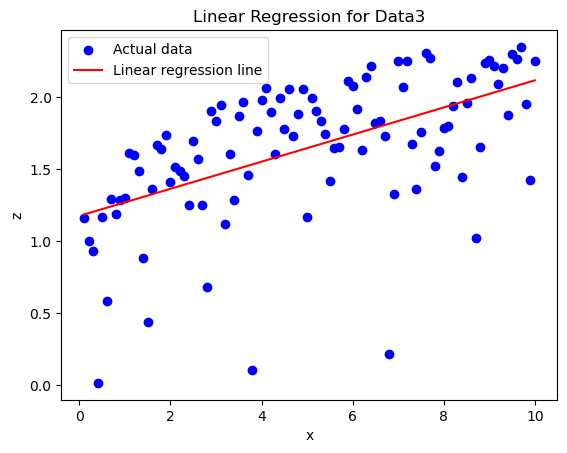

In [44]:
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression

# Load the dataset
df3 = pd.read_csv("Data3.csv")

# Prepare the data
X = df3[['x']]
y = df3['z']
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_predicted, color='red', label='Linear regression line')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Linear Regression for Data3')
plt.legend()
plt.show()


In [45]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Load the data
df3 = pd.read_csv("Data3.csv")
# Insert a column of ones as x0
df3.insert(1, 'x0', 1)
# Prepare the input and output data
input_columns = ['x0', 'x']
X = df3[input_columns].values
y = df3['z'].values
# Train a linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)
# Predict using scikit-learn model
y_pred_sklearn = model_sklearn.predict(X)

# Calculate evaluation metrics using scikit-learn model
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y, y_pred_sklearn)

# Print evaluation metrics for scikit-learn model
print("Scikit-learn Model:")
print("Mean Squared Error:", mse_sklearn)
print("Mean Absolute Error:", mae_sklearn)
print("R-squared:", r2_sklearn)
print("Root Mean Squared Error:", rmse_sklearn)



Scikit-learn Model:
Mean Squared Error: 0.16173044143088552
Mean Absolute Error: 0.29467793301310374
R-squared: 0.3136973226728079
Root Mean Squared Error: 0.4021572347116057


In [46]:
def gradientDescent(X_test, Y_test):
        global w
        x = np.array([X_test[i] for i in X_test.columns])
        xt = x.T
        w = np.zeros((1, len(X_test.columns)))
        for i in range(100000):
            gradient = (w @ x - np.array([Y_test])) @ xt
            w = (w - 0.00005*gradient)
        return w
gradientDescent(input_df,df3['z'])
print("w using gradient descent: ", gradientDescent(input_df,df3['z']))

w using gradient descent:  [[1.17706208 0.09419021]]


DATASET 2

In [47]:
import pandas as pd
import numpy as np

df2 = pd.read_csv("Data2.csv")
# Insert a column of ones as x0
df2["x"] = df2["x"]
df2.insert(1, 'x0', 1)
df2["y"] = np.log((df2["y"]))
input_columns = ['x0', 'x']
input_df = df2[input_columns]


def linear(input, output):

    input_df = input.copy()
    df2['y'] = output

    # NumPy array 'x' containing the transpose of the input features
    X = np.array([input_df[feature] for feature in input_columns])
    X_transpose = X.T

    # the product of x and its transpose
    productof_X_X_transpose = np.dot(X, X_transpose)

    # the inverse of x_xt
    inverseof_X_X_transpose = np.linalg.inv(productof_X_X_transpose)

    # the product of x and the target variable 'y'
    sum_xy = np.dot(X, np.array([df2['y']]).T)

    # weight vector 'w'
    w = np.dot(inverseof_X_X_transpose, sum_xy)
    print('w: ',w)
    y_predicted = X_transpose @ w
    return y_predicted

y_predicted = linear(input_df, df2['y'])
df2["y_predicted"] = y_predicted

def calculate_error(Y_predicted, Y_actual):

    Y_actual = np.array([Y_actual]).T
    mse = (((Y_actual - Y_predicted)**2)/len(Y_actual)).sum()
    mae = np.mean(np.abs(Y_actual - Y_predicted))
    rmse = np.sqrt(mse)

    rss = ((Y_actual - Y_predicted)**2).sum()
    tss = ((Y_actual - Y_actual.sum()/len(Y_actual))**2).sum()
    r_square = (1 - (rss/tss))


    print("Mean Square Error : ", mse)
    print("Mean Absolute Error : ", mae)
    print("R_Square Value : ", r_square)
    print("Root Mean Sq Error: ", rmse)

calculate_error(y_predicted,df2['y'])

w:  [[3.68212267]
 [0.97299745]]
Mean Square Error :  0.07643342704351964
Mean Absolute Error :  0.23498835289025644
R_Square Value :  0.9904038522690993
Root Mean Sq Error:  0.27646596000867746


In [48]:
df2

,x,x0,y,y_predicted
0,0.1,1,4.054382,3.779422
1,0.2,1,3.858806,3.876722
2,0.3,1,4.240881,3.974022
3,0.4,1,3.625696,4.071322
4,0.5,1,4.364459,4.168621
...,...,...,...,...
95,9.6,1,12.803830,13.022898
96,9.7,1,13.689868,13.120198
97,9.8,1,13.867683,13.217498
98,9.9,1,13.017678,13.314797


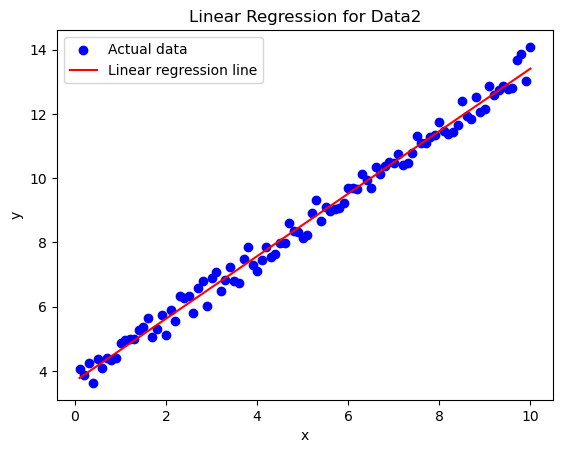

In [49]:
import matplotlib.pyplot as plt
X = df2[['x']]
y = df2['y']
y_predicted1 = df2[["y_predicted"]]
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_predicted1, color='red', label='Linear regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression for Data2')
plt.legend()
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df2 = pd.read_csv("Data2.csv")
# Train a linear regression model using scikit-learn
X = input_df[['x']]
df2["y"] = np.log(df2["y"])
Y = df2['y']
model = LinearRegression()
model.fit(X, Y)

# Make predictions
y_pred = model.predict(X)

# Calculate error metrics
mse_sklearn = mean_squared_error(Y, y_pred)
mae_sklearn = mean_absolute_error(Y, y_pred)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(Y, y_pred)

print("Scikit-learn Model:")
print("Mean Squared Error:", mse_sklearn)
print("Mean Absolute Error:", mae_sklearn)
print("R-squared:", r2_sklearn)
print("Root Mean Squared Error:", rmse_sklearn)



Scikit-learn Model:
Mean Squared Error: 0.07643342704351967
Mean Absolute Error: 0.2349883528902572
R-squared: 0.9904038522690993
Root Mean Squared Error: 0.2764659600086775


In [51]:
def gradientDescent(X_test, Y_test):
        w =0
        x = np.array([X_test[i] for i in X_test.columns])
        xt = x.T
        w = np.zeros((1, len(input_df.columns)))
        for i in range(100000):
            gradient = (w @ x - np.array([Y_test])) @ xt
            w = (w - 0.00005*gradient)
        return w
gradientDescent(input_df,df2['y'])

print("w using gradient descent: ", gradientDescent(input_df,df2['y']))

w using gradient descent:  [[3.68212267 0.97299745]]


DATASET 1

In [52]:

import pandas as pd
import numpy as np

df1 = pd.read_csv("Data1.csv")
# Insert a column of ones as x0
df1.insert(1, 'x0', 1)
input_columns = ['x0', 'x']
input_df = df1[input_columns]

def linear(input, output):

    input_df = input.copy()
    df1['y'] = output

    # NumPy array 'x' containing the transpose of the input features
    X = np.array([input_df[feature] for feature in input_columns])
    X_transpose = X.T

    #product of x and its transpose
    productof_X_X_transpose = np.dot(X, X_transpose)

    # inverse of x_xt
    inverseof_X_X_transpose = np.linalg.inv(productof_X_X_transpose)

    # product of x and the target variable 'y'
    sum_xy = np.dot(X, np.array([df1['y']]).T)

    #weight vector 'w'
    w = np.dot(inverseof_X_X_transpose, sum_xy)
    print('w:',w)
    y_predicted = X_transpose @ w
    return y_predicted
y_predicted = linear(input_df, df1['y'])

def calculate_error(Y_predicted, Y_actual):

    Y_actual = np.array([Y_actual]).T
    mse = (((Y_actual - Y_predicted)**2)/len(Y_actual)).sum()
    mae = np.mean(np.abs(Y_actual - Y_predicted))
    rmse = np.sqrt(mse)

    rss = ((Y_actual - Y_predicted)**2).sum()
    tss = ((Y_actual - Y_actual.sum()/len(Y_actual))**2).sum()
    r_square = (1 - rss/tss)


    print("Mean Square Error : ", mse)
    print("Mean Absolute Error : ", mae)
    print("R_Square Value : ", r_square)
    print("Root Mean Sq Error: ", rmse)


calculate_error(y_predicted,df1['y'])

w: [[5.68078713]
 [2.38406007]]
Mean Square Error :  2.078525401777326
Mean Absolute Error :  1.280555978429146
R_Square Value :  0.9579571905586358
Root Mean Sq Error:  1.4417091945941547


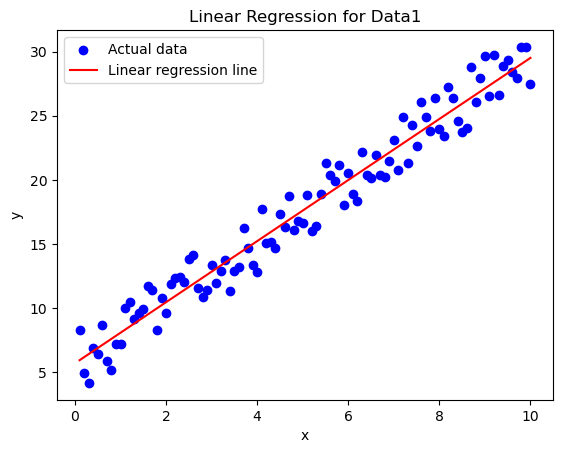

In [53]:
import matplotlib.pyplot as plt
X = df1[['x']]
y = df1['y']
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_predicted, color='red', label='Linear regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression for Data1')
plt.legend()
plt.show()

In [54]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X = df1[input_columns].values
y = df1['y'].values

# Train a linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Predict using scikit-learn model
y_pred_sklearn = model_sklearn.predict(X)

# Calculate evaluation metrics using scikit-learn model
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y, y_pred_sklearn)

# Print evaluation metrics for scikit-learn model
print("Scikit-learn Model:")
print("Mean Squared Error:", mse_sklearn)
print("Mean Absolute Error:", mae_sklearn)
print("R-squared:", r2_sklearn)
print("Root Mean Squared Error:", rmse_sklearn)

Scikit-learn Model:
Mean Squared Error: 2.078525401777328
Mean Absolute Error: 1.2805559784291471
R-squared: 0.9579571905586357
Root Mean Squared Error: 1.4417091945941551


In [55]:
def gradient_des(X_test, Y_test):
        global w
        x = np.array([X_test[i] for i in X_test.columns])
        xtrans = x.T
        w = np.zeros((1, len(X_test.columns)))
        for i in range(100000):
            gradient = (w @ x - np.array([Y_test])) @ xtrans
            w = (w - 0.00005*gradient)
        return w
gradient_des(input_df,df1['y'])
print("w using gradient descent: ", gradient_des(input_df, df1['y']))

w using gradient descent:  [[5.68078713 2.38406007]]
